In [2]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir
from scipy.stats import norm

plt.style.use('seaborn-v0_8-whitegrid') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [3]:
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)

from utils import load_spectral_types

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
name = "GUMS"
data_dir = join(root_data_dir, name)
data_dir

'/home2/s20321005/Thesis-Project/Data/GUMS'

In [6]:
# path to best-pars, created at 3.3. Best-pars.ipynb
files = glob(join(data_dir, "*.hdf5"))
files.sort()
files[:5]

['/home2/s20321005/Thesis-Project/Data/GUMS/gaia-000-010.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-010-020.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-020-030.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-030-040.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GUMS/gaia-040-050.hdf5']

In [7]:
gums_raw = vaex.open_many(files)
gums_raw = gums_raw.filter("barycentric_distance < 300")
gums_raw = gums_raw.extract()
gums_raw

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,1.6633632254125095,-80.81886027273642,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,1.6633711320080191,-80.81885970019108,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,1.6633664910531227,-80.81886003627946,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,2.0160566943963447,-83.75989510027239,288.9823913574219,-22.145519256591797,-24.457523345947266,72.62628936767578,11.677238464355469,12.009957313537598,11.154930114746094,-0.6232308745384216,0.25761985778808594,0.9319999814033508,2,4.252999782562256,6109.42041015625,F8V,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,4.987826313220024,-82.07222473744288,299.8387756347656,31.349788665771484,11.576214790344238,-3.0559165477752686,13.692413330078125,14.255208015441895,12.951836585998535,-0.10409808903932571,0.03148368000984192,1.3609999418258667,1,nan,nan,,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,363,970",0.09289991081989091,0.027135800891125234,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.87679847226846,-1.0543971102886738,-64.16630605815858,36.43301444208484,6.516783714294434,49.19524430330982,39.687265513807574,13.880837608165828,17.206305055981026,-20.009719429185893,27.323602232416846,8.175789781432279,-31.23767971672417,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"8,363,971",0.09219526288528451,0.027157507151460893,97.30824279785156,61.02073669433594,-32.07533264160156,-17.297887802124023,20.55450439453125,20.845216751098633,20.074209213256836,-0.06657887995243073,0.024732176214456558,0.699999988079071,1,8.210000038146973,4742.42138671875,DBVII,1.8754231634424516,-1.0542090764429115,-84.61047562053794,48.06205917011865,15.61375617980957,51.65224942895254,-45.65525599225283,-21.05807916433706,23.824138839031715,4.639770017232015,-26.853903900430428,30.78173545167858,18.471776002807264,18.471776002807264,30.78173545167858,11.889770017232015,2.7244789636245114e-07,8.407946989563547e-08,9.940940142573465e-10,0.308607520991024,84.57899221780181,0.032676090457873126,-14.415600106543653,45.849231239358915,--,--,--
"8,363,972",0.09158597347175086,0.027258588627058506,155.89895629882812,48.82033157348633,35.40953826904297,21.85403823852539,9.85661792755127,10.131072044372559,9.40859603881836,-0.08244267851114273,0.039174336940050125,0.9459999799728394,2,4.181000232696533,6109.42041015625,F6IV,1.874274463609862,-1.0539658886805623,-135.53694844992208,77.0338898144647,3.89240169

In [8]:
# transform ra,dec to galactic coordinates
ra = gums_raw['ra'].to_numpy()
dec = gums_raw['dec'].to_numpy()

from astropy.coordinates import SkyCoord
from astropy import units as u

c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
l, b = c.galactic.l.value, c.galactic.b.value
gums_raw['l'] = l*np.pi/180
gums_raw['b'] = b*np.pi/180
gums_raw["ra"] = gums_raw["ra"]*np.pi/180
gums_raw["dec"] = gums_raw["dec"]*np.pi/180
gums_raw

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,0.03518682722408933,-1.4618859506248192,288.9823913574219,-22.145519256591797,-24.457523345947266,72.62628936767578,11.677238464355469,12.009957313537598,11.154930114746094,-0.6232308745384216,0.25761985778808594,0.9319999814033508,2,4.252999782562256,6109.42041015625,F8V,5.311613314115634,-0.580320918806358,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,0.08705399168329939,-1.432430546105117,299.8387756347656,31.349788665771484,11.576214790344238,-3.0559165477752686,13.692413330078125,14.255208015441895,12.951836585998535,-0.10409808903932571,0.03148368000984192,1.3609999418258667,1,nan,nan,,5.31021423896265,-0.6104308359091444,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,363,970",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.6847749666236256,-1.050697568268841,-64.16630605815858,36.43301444208484,6.516783714294434,49.19524430330982,39.687265513807574,13.880837608165828,17.206305055981026,-20.009719429185893,27.323602232416846,8.175789781432279,-31.23767971672417,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"8,363,971",0.0016091108920899418,0.000473987916426899,97.30824279785156,61.02073669433594,-32.07533264160156,-17.297887802124023,20.55450439453125,20.845216751098633,20.074209213256836,-0.06657887995243073,0.024732176214456558,0.699999988079071,1,8.210000038146973,4742.42138671875,DBVII,1.6847525417664018,-1.0506923532645116,-84.61047562053794,48.06205917011865,15.61375617980957,51.65224942895254,-45.65525599225283,-21.05807916433706,23.824138839031715,4.639770017232015,-26.853903900430428,30.78173545167858,18.471776002807264,18.471776002807264,30.78173545167858,11.889770017232015,2.7244789636245114e-07,8.407946989563547e-08,9.940940142573465e-10,0.308607520991024,84.57899221780181,0.032676090457873126,-14.415600106543653,45.849231239358915,--,--,--
"8,363,972",0.0015984767857262342,0.0004757521209888516,155.89895629882812,48.82033157348633,35.40953826904297,21.85403823852539,9.85661792755127,10.131072044372559,9.40859603881836,-0.08244

In [9]:
gums_raw['z'] = gums_raw.evaluate('barycentric_distance * sin(b)')
gums_raw['r'] = gums_raw.evaluate('barycentric_distance * cos(b)')

gums_raw

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,0.03518682722408933,-1.4618859506248192,288.9823913574219,-22.145519256591797,-24.457523345947266,72.62628936767578,11.677238464355469,12.009957313537598,11.154930114746094,-0.6232308745384216,0.25761985778808594,0.9319999814033508,2,4.252999782562256,6109.42041015625,F8V,5.311613314115634,-0.580320918806358,-158.4468330679572,241.6721407307616,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,0.08705399168329939,-1.432430546105117,299.8387756347656,31.349788665771484,11.576214790344238,-3.0559165477752686,13.692413330078125,14.255208015441895,12.951836585998535,-0.10409808903932571,0.03148368000984192,1.3609999418258667,1,nan,nan,,5.31021423896265,-0.6104308359091444,-171.87374509842158,245.6882315455873,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,363,970",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.6847749666236256,-1.050697568268841,-64.03108178864073,36.670150524136695,6.516783714294434,49.19524430330982,39.687265513807574,13.880837608165828,17.206305055981026,-20.009719429185893,27.323602232416846,8.175789781432279,-31.23767971672417,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"8,363,971",0.0016091108920899418,0.000473987916426899,97.30824279785156,61.02073669433594,-32.07533264160156,-17.297887802124023,20.55450439453125,20.845216751098633,20.074209213256836,-0.06657887995243073,0.024732176214456558,0.699999988079071,1,8.210000038146973,4742.42138671875,DBVII,1.6847525417664018,-1.0506923532645116,-84.44093180864103,48.35931297789567,15.61375617980957,51.65224942895254,-45.65525599225283,-21.05807916433706,23.824138839031715,4.639770017232015,-26.853903900430428,30.78173545167858,18.471776002807264,18.471776002807264,30.78173545167858,11.889770017232015,2.7244789636245114e-07,8.407946989563547e-08,9.940940142573465e-10,0.308607520991024,84.57899221780181,0.032676090457873126,-14.415600106543653,45.849231239358915,--,--,--
"8,363,972",0.00159847678572

In [10]:
gums = gums_raw.filter("abs(z) < 200").filter("r < 150").filter("abs(z)>50")
gums = gums.extract()
gums["M_G"] = gums["mag_g"] - 5 * np.log10(gums["barycentric_distance"]) + 5
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.6847749666236256,-1.050697568268841,-64.03108178864073,36.670150524136695,6.516783714294434,49.19524430330982,39.687265513807574,13.880837608165828,17.206305055981026,-20.009719429185893,27.323602232416846,8.175789781432279,-31.23767971672417,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"4,424,403",0.0016091108920899418,0.000473987916426899,97.30824279785156,61.02073669433594,-32.07533264160156,-17.297887802124023,20.55450439453125,20.845216751098633,20.074209213256836,-0.06657887995243073,0.024732176214456558,0.699999988079071,1,8.210000038146973,4742.42138671875,DBVII,1.6847525417664018,-1.0506923532645116,-84.44093180864103,48.35931297789567,15.61375617980957,51.65224942895254,-45.65525599225283,-21.05807916433706,23.824138839031715,4.639770017232015,-26.853903900430428,30.78173545167858,18.471776002807264,18.471776002807264,30.78173545167858,11.889770017232015,2.7244789636245114e-07,8.407946989563547e-08,9.940940142573465e-10,0.308607520991024,84.57899221780

In [11]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(gums.dec) - np.cos(delta_G)*np.sin(gums.dec)*np.cos(gums.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(gums.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

gums["pmlon"] = 1/cosb*(C1*gums.pmra+C2*gums.pmdec)
gums["pmlat"] = 1/cosb*(-1*C2*gums.pmra+C1*gums.pmdec)
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,-64.42059629244157,-60.74603892740473,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,-64.42060297825596,-60.74604042012304,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,-64.42059924897016,-60.74603865302107,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,-37.18179598102539,51.25958260122081,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,-11.789872682077766,10.92894862421532,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.6847749666236256,-1.050697568268841,-64.03108178864073,36.670150524136695,6.516783714294434,55.14481437460256,30.89175543112473,13.880837608165828,17.206305055981026,-20.009719429185893,27.323602232416846,8.175789781432279,-31.23767971672417,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"4,424,403",0.0016091108920899418,0.000473987916426899,97.30824279785156,61.02073669433594,-32.07533264160156,-17.297887802124023,20.55450439453125,20.845216751098633,20.074209213256836,-0.06657887995243073,0.024732176214456558,0.699999988079071,1,8.210000038146973,4742.42138671875,DBVII,1.6847525417664018,-1.0506923532645116,-84.44093180864103,48.35931297789567,15.61375617980957,43.3446223047382,-53.60597903264577,-21.05807916433706,23.824138839031715,4.639770017232015,-26.853903900430428,30.78173545167858,18.47177600280726

In [12]:
# calculate vertical velocities and their errors
gums['vb'] = 4.74*gums["pmlat"]*gums["barycentric_distance"]/1000
gums["vphi"] = 4.74*gums["pmlon"]*gums["barycentric_distance"]/1000

gums["w"] = gums["vb"]*np.cos(gums.b) + gums["radial_velocity"]*np.sin(gums.b)
gums["v_xy"] = gums["radial_velocity"]*np.cos(gums.b) - gums["vb"]*np.sin(gums.b)
gums["v"] = gums["vphi"]*np.sin(gums.l) + gums["v_xy"]*np.cos(gums.l)
gums["u"] = gums["vphi"]*np.cos(gums.l) - gums["v_xy"]*np.sin(gums.l)
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,-64.42059629244157,-60.74603892740473,-49.309834140343106,-52.29260992965306,-31.019573023259955,-41.14378974453962,19.09209476169761,-63.74025733716559,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,-64.42060297825596,-60.74604042012304,-49.30983535203844,-52.29261535677892,-19.27026386792578,-57.24579895248249,9.8265013395092,-76.90929066104238,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,-64.42059924897016,-60.74603865302107,-49.30983391761561,-52.292612329578006,-26.16551474012583,-47.7961024137048,15.264148641962727,-69.18085339477216,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,-37.18179598102539,51.25958260122081,36.35332226133352,-26.369348772675718,-17.417301553548118,83.54629746201532,69.03020552116202,53.94587194598577,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,-11.789872682077766,10.92894862421532,8.975243198048771,-9.682264802784447,-2.412326314365873,19.90320633259844,19.15948509936902,11.081426115635185,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.6847749666236256,-1.050697568268841,-64.03108178864073,36.670150524136695,6.516783714294434,55.14481437460256,30.89175543112473,10.804559977089687,19.287199643422078,-21.43730280959895,24.727940117079964,16.349695498599438,-26.761064059976963,-31.23767971672417,8.175789781432279,-12.759719429185893,1.4153226309356453e-06,2.1645944860094743e-07,1.9130707071393e-09,0.15294000383350745,113.14764676138338,0.01619364746472432,-10.975406167904463,34.74053829155051,--,--,--
"4,424,403",0.0016091108920899418,0.000473987916426899,9

In [13]:
gums["u_LSR"] = gums["u"]# - 11.1
gums["v_LSR"] = gums["v"]# - 12.4
gums["w_LSR"] = gums["w"] + 7.25

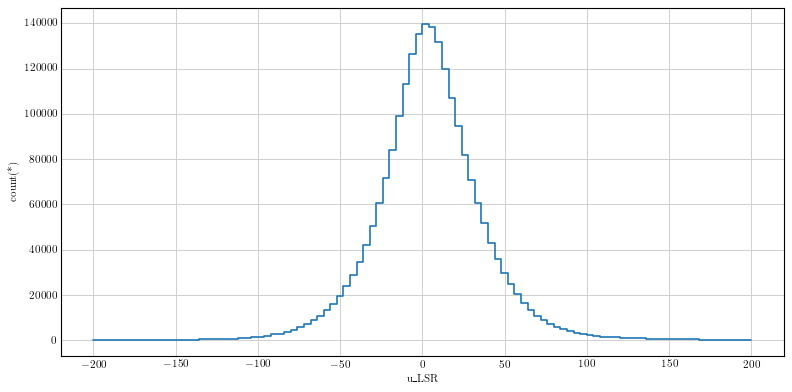

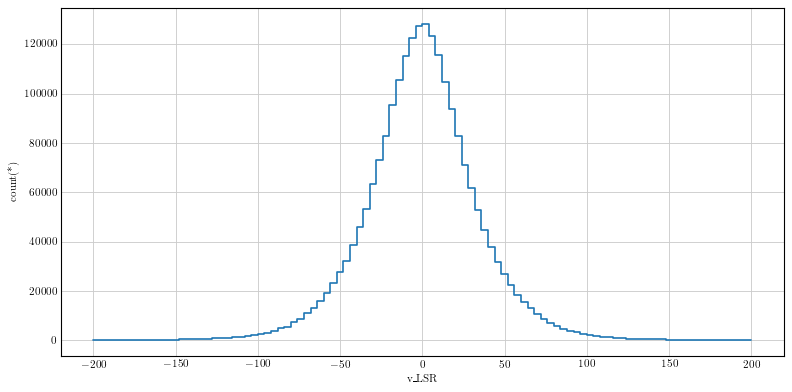

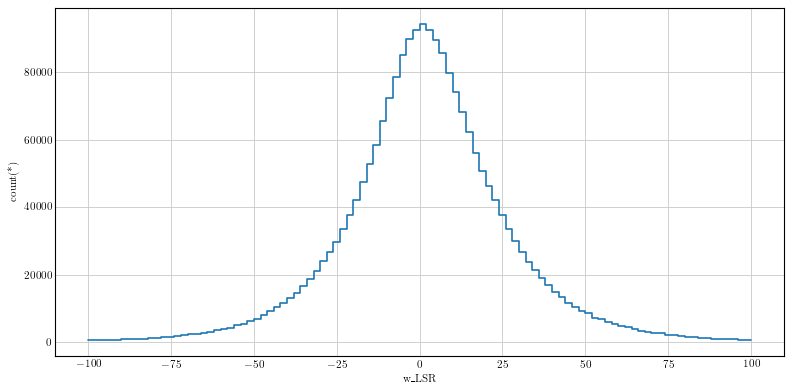

In [14]:
gums.viz.histogram("u_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("v_LSR", shape=100, limits=[-200, 200], figsize=(10, 5))
gums.viz.histogram("w_LSR", shape=100, limits=[-100, 100], figsize=(10, 5))

In [14]:
from scipy.stats import norm

gums["f_D"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=16))
gums["f_TD"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=35))
gums["f_H"] = (norm.pdf(gums["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(gums["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(gums["w_LSR"].to_numpy(), loc=0, scale=90))
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,-64.42059629244157,-60.74603892740473,-49.309834140343106,-52.29260992965306,-31.019573023259955,-41.14378974453962,19.09209476169761,-63.74025733716559,-63.74025733716559,19.09209476169761,-23.769573023259955,8.377606157339225e-08,8.297877737575601e-08,1.2823873937279025e-09,--,--,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,-64.42060297825596,-60.74604042012304,-49.30983535203844,-52.29261535677892,-19.27026386792578,-57.24579895248249,9.8265013395092,-76.90929066104238,-76.90929066104238,9.8265013395092,-12.020263867925781,1.769442868955555e-07,1.1813849839374605e-07,1.6598090898791762e-09,--,--,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,-64.42059924897016,-60.74603865302107,-49.30983391761561,-52.292612329578006,-26.16551474012583,-47.7961024137048,15.264148641962727,-69.18085339477216,-69.18085339477216,15.264148641962727,-18.91551474012583,1.271790120433541e-07,9.850294317419305e-08,1.4325785366107546e-09,--,--,--,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,-37.18179598102539,51.25958260122081,36.35332226133352,-26.369348772675718,-17.417301553548118,83.54629746201532,69.03020552116202,53.94587194598577,53.94587194598577,69.03020552116202,-10.167301553548118,2.0736293145427073e-10,5.057070034099225e-09,2.6493836094633365e-10,--,--,--,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,-11.789872682077766,10.92894862421532,8.975243198048771,-9.682264802784447,-2.412326314365873,19.90320633259844,19.15948509936902,11.081426115635185,11.081426115635185,19.15948509936902,4.837673685634127,1.197944396447562e-06,1.6004507194263954e-07,1.4292059761251725e-09,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.856715202331543,11.292930603027344,10.238791465759277,0.09827904403209686,0.028436360880732536,0.671999990940094,1,4.6579999923706055,4920.3955078125,K1.5V,1.

In [15]:
gums["fTD_fD"] = gums["f_TD"]/gums["f_D"]
gums["fTD_fH"] = gums["f_TD"]/gums["f_H"]
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,-64.42059629244157,-60.74603892740473,-49.309834140343106,-52.29260992965306,-31.019573023259955,-41.14378974453962,19.09209476169761,-63.74025733716559,-63.74025733716559,19.09209476169761,-23.769573023259955,8.377606157339225e-08,8.297877737575601e-08,1.2823873937279025e-09,0.9904831501664975,64.70648244173435,--,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,-64.42060297825596,-60.74604042012304,-49.30983535203844,-52.29261535677892,-19.27026386792578,-57.24579895248249,9.8265013395092,-76.90929066104238,-76.90929066104238,9.8265013395092,-12.020263867925781,1.769442868955555e-07,1.1813849839374605e-07,1.6598090898791762e-09,0.6676592981127409,71.17595578558122,--,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,-64.42059924897016,-60.74603865302107,-49.30983391761561,-52.292612329578006,-26.16551474012583,-47.7961024137048,15.264148641962727,-69.18085339477216,-69.18085339477216,15.264148641962727,-18.91551474012583,1.271790120433541e-07,9.850294317419305e-08,1.4325785366107546e-09,0.7745220032108312,68.75919236318786,--,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,-37.18179598102539,51.25958260122081,36.35332226133352,-26.369348772675718,-17.417301553548118,83.54629746201532,69.03020552116202,53.94587194598577,53.94587194598577,69.03020552116202,-10.167301553548118,2.0736293145427073e-10,5.057070034099225e-09,2.6493836094633365e-10,24.38753155461852,19.087722955769298,--,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,-11.789872682077766,10.92894862421532,8.975243198048771,-9.682264802784447,-2.412326314365873,19.90320633259844,19.15948509936902,11.081426115635185,11.081426115635185,19.15948509936902,4.837673685634127,1.197944396447562e-06,1.6004507194263954e-07,1.4292059761251725e-09,0.13359975005287755,111.98180991136752,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707157467,73.78807067871094,38.41782760620117,50.19284439086914,30.891592025756836,10.8

In [16]:
gums["TD_D"] = gums["fTD_fD"]*0.09/0.85
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br,main,thin
0,0.029031164940040904,-1.4105552094684928,171.25262451171875,75.92414855957031,45.55895233154297,-14.952110290527344,14.412109375,15.217318534851074,13.497110366821289,-0.08759593218564987,0.06376101821660995,0.5540000200271606,1,4.741000175476074,3917.418701171875,K9V,5.3255203595758855,-0.6303688066816927,-100.94361345219545,138.3396122062133,8.24392318725586,-64.42059629244157,-60.74603892740473,-49.309834140343106,-52.29260992965306,-31.019573023259955,-41.14378974453962,19.09209476169761,-63.74025733716559,-63.74025733716559,19.09209476169761,-23.769573023259955,8.377606157339225e-08,8.297877737575601e-08,1.2823873937279025e-09,0.9904831501664975,64.70648244173435,0.10487468648821738,--,--,--,--,--
1,0.029031302936165168,-1.4105551994756915,171.25262451171875,75.92414855957031,45.558963775634766,-34.8850212097168,15.20473861694336,16.01616668701172,14.287736892700195,-0.08759593218564987,0.06376101821660995,0.38999998569488525,1,4.925000190734863,3899.419921875,K9V,5.325520335596509,-0.6303688211532993,-100.94361545419187,138.33961074539704,9.036552429199219,-64.42060297825596,-60.74604042012304,-49.30983535203844,-52.29261535677892,-19.27026386792578,-57.24579895248249,9.8265013395092,-76.90929066104238,-76.90929066104238,9.8265013395092,-12.020263867925781,1.769442868955555e-07,1.1813849839374605e-07,1.6598090898791762e-09,0.6676592981127409,71.17595578558122,0.07069333744723139,--,--,--,--,--
2,0.029031221936221794,-1.4105552053415404,171.25262451171875,75.92414855957031,45.558956146240234,-23.187105178833008,13.985069274902344,14.792296409606934,13.069418907165527,-0.08759593218564987,0.06376101821660995,0.9440000057220459,1,nan,nan,,5.325520349671654,-0.630368812658523,-100.94361427902783,138.33961160289047,7.816883087158203,-64.42059924897016,-60.74603865302107,-49.30983391761561,-52.292612329578006,-26.16551474012583,-47.7961024137048,15.264148641962727,-69.18085339477216,-69.18085339477216,15.264148641962727,-18.91551474012583,1.271790120433541e-07,9.850294317419305e-08,1.4325785366107546e-09,0.7745220032108312,68.75919236318786,0.08200821210467624,--,--,--,--,--
3,0.09950114827408309,-1.3972084088721222,149.620361328125,29.704421997070312,-55.9256477355957,77.21257781982422,15.577180862426758,16.695756912231445,14.487913131713867,-0.3116430640220642,0.057949163019657135,0.3630000054836273,1,4.927999973297119,3580.96435546875,M1V,5.3141083483932325,-0.64556434470013,-90.01898722565747,119.51081316276615,9.702227592468262,-37.18179598102539,51.25958260122081,36.35332226133352,-26.369348772675718,-17.417301553548118,83.54629746201532,69.03020552116202,53.94587194598577,53.94587194598577,69.03020552116202,-10.167301553548118,2.0736293145427073e-10,5.057070034099225e-09,2.6493836094633365e-10,24.38753155461852,19.087722955769298,2.5822092234301963,--,--,--,--,--
4,0.08362719881101764,-1.458316658746946,173.25648498535156,10.019695281982422,-12.57174301147461,17.92768669128418,11.773536682128906,12.171599388122559,11.191262245178223,0.031157391145825386,0.04760254919528961,0.8830000162124634,1,4.546000003814697,5308.84423828125,G7V,5.306052829116288,-0.5847707636383223,-95.6390091988132,144.46795322475043,5.580089569091797,-11.789872682077766,10.92894862421532,8.975243198048771,-9.682264802784447,-2.412326314365873,19.90320633259844,19.15948509936902,11.081426115635185,11.081426115635185,19.15948509936902,4.837673685634127,1.197944396447562e-06,1.6004507194263954e-07,1.4292059761251725e-09,0.13359975005287755,111.98180991136752,0.01414585588795174,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,424,402",0.0016214093186162012,0.0004736090707

Text(-3, 4, 'Piringan tebal')

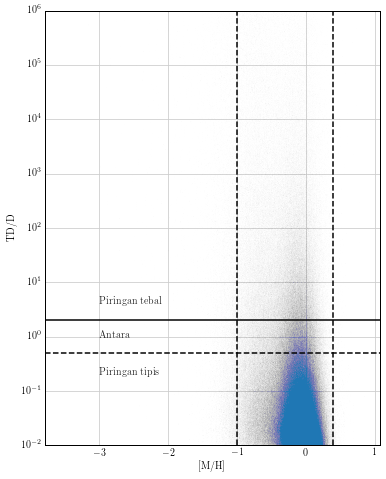

In [26]:
plt.figure(figsize=(6, 8))
gums.viz.scatter("feh", "TD_D", length_check=False, s=0.01, alpha=0.01)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")

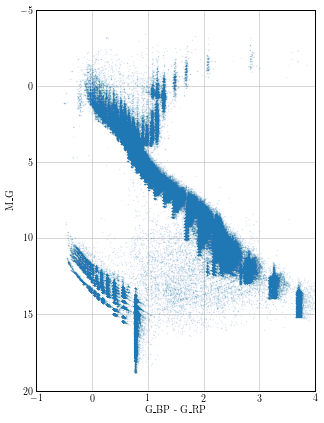

In [29]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1)
plt.xlabel("G_BP - G_RP")
plt.ylabel("M_G")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.gca().invert_yaxis()
plt.show()

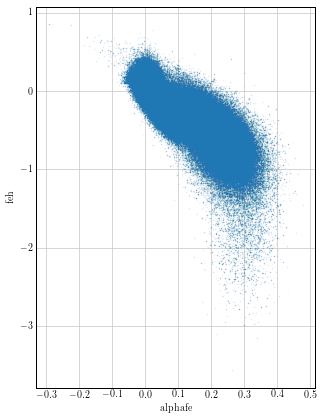

In [30]:
plt.figure(figsize=(5, 7))
gums.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1)
# reverse y-axis
# plt.xlim(-1,4)
# plt.ylim(-5, 20)
plt.show()

In [17]:
gums_thin = gums.filter("population == 1")
gums_thin = gums_thin.extract()
gums_thick = gums.filter("population == 2")
gums_thick = gums_thick.extract()
gums_halo = gums.filter("population == 3")
gums_halo = gums_halo.extract()

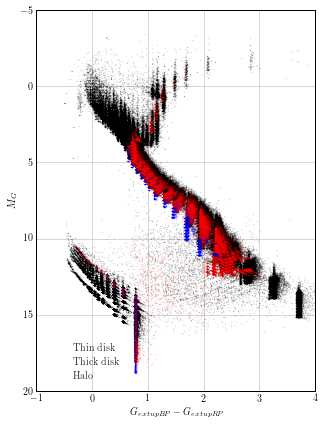

In [32]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("mag_bp - mag_rp", "M_G", length_check=False, s=0.1, alpha=0.1, c="b")
plt.xlabel("$G_{\textup{BP}} - G_{\textup{RP}}$")
plt.ylabel("$M_G$")
# reverse y-axis
plt.xlim(-1,4)
plt.ylim(-5, 20)
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.gca().invert_yaxis()
plt.show()

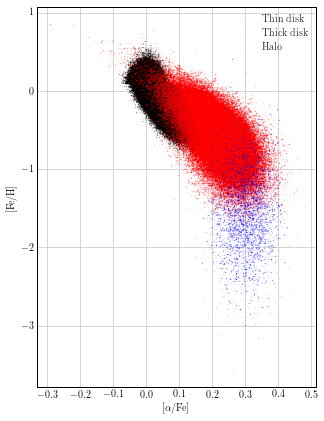

In [17]:
plt.figure(figsize=(5, 7))
gums_thin.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="k")
gums_thick.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="r")
gums_halo.viz.scatter("alphafe", "feh", length_check=False, s=0.1, alpha=0.1, c="b")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("[Fe/H]")
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.show()

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)


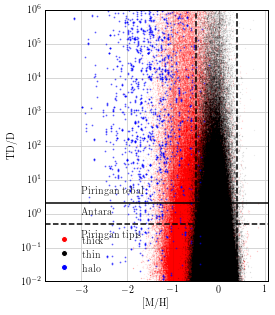

In [34]:
from matplotlib.lines import Line2D

plt.figure(figsize=(4, 5))
gums_thick.viz.scatter("feh", "fTD_fD*0.09/0.85", length_check=False, s=0.1, alpha=0.1, c="r")
gums_thin.viz.scatter("feh", "TD_D", length_check=False, s=0.1, alpha=0.1, c="k")
gums_halo.viz.scatter("feh", "TD_D", length_check=False, s=0.7, alpha=0.5, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
plt.text(-3, 2E-1, "Piringan tipis")
plt.text(-3, 0.9, "Antara")
plt.text(-3, 4, "Piringan tebal")
handles = [Line2D([0], [0], marker='o', color='w', label='thick', markerfacecolor='r'), 
           Line2D([0], [0], marker='o', color='w', label='thin', markerfacecolor='k'),
           Line2D([0], [0], marker='o', color='w', label='halo', markerfacecolor='b')]
plt.legend(loc="best", handles=handles)
plt.savefig("TD_D.pdf", format="pdf", bbox_inches="tight")
plt.show()

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


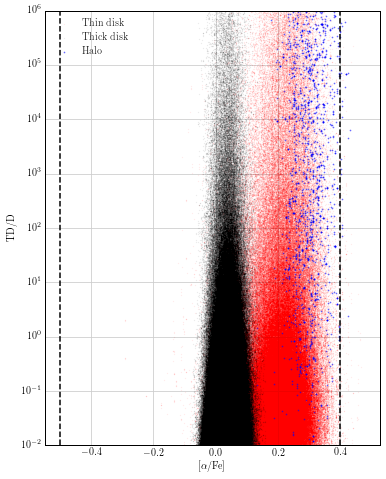

In [35]:
plt.figure(figsize=(6, 8))
gums_thick.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="r")
gums_thin.viz.scatter("alphafe", "TD_D", length_check=False, s=0.1, alpha=0.1, c="k")
gums_halo.viz.scatter("alphafe", "TD_D", length_check=False, s=0.5, alpha=0.5, c="b")
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-0.5, c="k", ls="--")
# plt.axvline(-0.3, c="r")
# plt.axhline(2, c="k")
# plt.axhline(-0.5, c="k", ls="--")
plt.xlabel(r"[$\alpha$/Fe]")
plt.ylabel("TD/D")
# plt.text(-3, 2E-1, "Piringan tipis")
# plt.text(-3, 0.9, "Antara")
# plt.text(-3, 4, "Piringan tebal")
plt.legend(["Thin disk", "Thick disk", "Halo"])
plt.show()

# Train Disk Population

In [18]:
gums.column_names

['ra',
 '__ra',
 'dec',
 '__dec',
 'barycentric_distance',
 'pmra',
 'pmdec',
 'radial_velocity',
 'mag_g',
 'mag_bp',
 'mag_rp',
 'feh',
 'alphafe',
 'mass',
 'population',
 'logg',
 'teff',
 'spectral_type',
 'l',
 '__l_1',
 'b',
 '__b_1',
 'z',
 '__z_1',
 'r',
 '__r_1',
 'M_G',
 '__M_G',
 'pmlon',
 '__pmlon',
 'pmlat',
 '__pmlat',
 'vb',
 '__vb',
 'vphi',
 '__vphi',
 'w',
 '__w',
 'v_xy',
 '__v_xy',
 'v',
 '__v',
 'u',
 '__u',
 'u_LSR',
 '__u_LSR',
 'v_LSR',
 '__v_LSR',
 'w_LSR',
 '__w_LSR',
 'f_D',
 '__f_D_1',
 'f_TD',
 '__f_TD_1',
 'f_H',
 '__f_H_1',
 'fTD_fD',
 '__fTD_fD',
 'fTD_fH',
 '__fTD_fH',
 'TD_D',
 '__TD_D',
 'x',
 'y',
 'br',
 'main',
 'thin']

In [20]:
gums['x'] = gums.evaluate('r*cos(l)')
gums['y'] = gums.evaluate('r*sin(l)')


In [22]:
gums.export(join(data_dir, "training-data.hdf5"), progress=True)

export(hdf5) [#######################################-] 97.58% estimated time:     1.42s =  0.0m =  0.0h    

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)


export(hdf5) [########################################] 100.00% elapsed time  :    59.78s =  1.0m =  0.0h
 

In [23]:
data = gums[['x', 'y', 'z', 'u', 'v', 'w', 'feh', 'alphafe', 'population']]
data = data.dropna()
data

#,x,y,z,u,v,w,feh,alphafe,population
0,79.60493957583478,-113.14107079435466,-100.94361345219545,-63.74025733716559,19.09209476169761,-31.019573023259955,-0.08759593,0.06376102,1
1,79.60493602218307,-113.14107150850266,-100.94361545419187,-76.90929066104238,9.8265013395092,-19.27026386792578,-0.08759593,0.06376102,1
2,79.60493810808863,-113.14107108935272,-100.94361427902783,-69.18085339477216,15.264148641962727,-26.16551474012583,-0.08759593,0.06376102,1
3,67.65037380872624,-98.52036026307051,-90.01898722565747,53.94587194598577,69.03020552116202,-17.417301553548118,-0.31164306,0.057949163,1
4,80.81562192659727,-119.74900735106729,-95.6390091988132,11.081426115635185,19.15948509936902,-2.412326314365873,0.031157391,0.04760255,1
...,...,...,...,...,...,...,...,...,...
"2,230,662",-10.975406167904463,34.74053829155051,-64.16630605815858,-31.23767971672417,8.175789781432279,-20.009719429185893,0.098279044,0.02843636,1
"2,230,663",-14.415600106543653,45.849231239358915,-84.61047562053794,18.471776002807264,30.78173545167858,4.639770017232015,-0.06657888,0.024732176,1
"2,230,664",-23.020900339264287,73.51366082244,-135.53694844992208,-36.58168135172564,31.798355809620386,-10.696678903589563,-0.08244268,0.039174337,2
"2,230,665",-20.402474018451077,65.11212634056403,-120.05215927855731,-40.807678242995536,27.28351551549361,-2.376234455121777,-0.036068216,-0.0076244753,1


In [24]:
data = data.to_pandas_df()
# reshufling the data
data = data.sample(frac=1).reset_index(drop=True)
data

,x,y,z,u,v,w,feh,alphafe,population
0,73.047206,95.176788,60.777498,60.405035,-178.975785,26.994945,-0.897331,0.214980,2
1,-21.706864,67.386424,-127.516780,-3.422556,23.000215,4.320729,0.093547,0.073884,1
2,-11.586792,90.464518,-167.491143,-33.467905,-24.997207,-25.838415,-0.368093,0.080824,1
3,-9.653994,61.741036,-112.836787,-22.092667,-4.178894,-32.913796,-0.289064,0.080613,1
4,-15.932403,50.814790,-102.530040,-19.612826,37.549426,-33.223122,-0.300357,0.087712,1
...,...,...,...,...,...,...,...,...,...
2230662,-16.124821,64.264929,-127.394808,49.374796,-33.653581,17.298889,-0.062700,0.098125,2
2230663,-41.631656,135.827401,112.066551,11.482822,-12.781790,1.583045,-0.052858,0.045879,1
2230664,-18.829536,69.103399,-138.822297,-56.901310,-33.219159,-99.967677,0.167037,-0.055096,1
2230665,-67.287124,36.384606,-53.974224,-28.691834,-17.128855,-26.755503,-0.388303,0.095345,1


In [30]:
maks = 1_000_000

data_filt = data[:maks]
data_filt

,x,y,z,u,v,w,feh,alphafe,population
0,73.047206,95.176788,60.777498,60.405035,-178.975785,26.994945,-0.897331,0.214980,2
1,-21.706864,67.386424,-127.516780,-3.422556,23.000215,4.320729,0.093547,0.073884,1
2,-11.586792,90.464518,-167.491143,-33.467905,-24.997207,-25.838415,-0.368093,0.080824,1
3,-9.653994,61.741036,-112.836787,-22.092667,-4.178894,-32.913796,-0.289064,0.080613,1
4,-15.932403,50.814790,-102.530040,-19.612826,37.549426,-33.223122,-0.300357,0.087712,1
...,...,...,...,...,...,...,...,...,...
999995,-12.713743,99.615741,-173.835751,12.455792,0.295017,-1.551245,-0.225858,0.073467,1
999996,-8.910696,46.674134,-89.173930,1.124971,1.290762,-3.193209,-0.373987,0.084007,1
999997,-4.481906,32.806070,-59.627252,0.777266,-39.593672,-34.836568,-0.109002,0.047049,1
999998,-8.427135,56.358317,-105.050400,-17.069600,-27.412715,-18.549183,-0.673506,0.168872,2


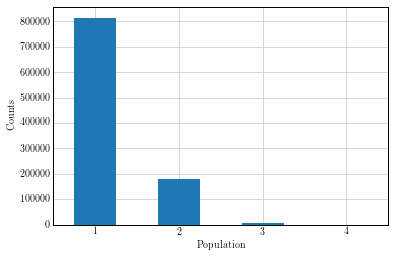

In [31]:
# aggregate the data by population
data_group = data_filt.groupby('population').count()
# bar plot the group counts, let takes x counts as the population
data_group.plot.bar(y='x', rot=0, legend=False)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()

In [32]:
X = data_filt[['x', 'y', 'z', 'u', 'v', 'w', 'feh', 'alphafe']]
X

,x,y,z,u,v,w,feh,alphafe
0,73.047206,95.176788,60.777498,60.405035,-178.975785,26.994945,-0.897331,0.214980
1,-21.706864,67.386424,-127.516780,-3.422556,23.000215,4.320729,0.093547,0.073884
2,-11.586792,90.464518,-167.491143,-33.467905,-24.997207,-25.838415,-0.368093,0.080824
3,-9.653994,61.741036,-112.836787,-22.092667,-4.178894,-32.913796,-0.289064,0.080613
4,-15.932403,50.814790,-102.530040,-19.612826,37.549426,-33.223122,-0.300357,0.087712
...,...,...,...,...,...,...,...,...
999995,-12.713743,99.615741,-173.835751,12.455792,0.295017,-1.551245,-0.225858,0.073467
999996,-8.910696,46.674134,-89.173930,1.124971,1.290762,-3.193209,-0.373987,0.084007
999997,-4.481906,32.806070,-59.627252,0.777266,-39.593672,-34.836568,-0.109002,0.047049
999998,-8.427135,56.358317,-105.050400,-17.069600,-27.412715,-18.549183,-0.673506,0.168872


In [33]:
# transform X with minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.74344792, 0.81724388, 0.65194397, ..., 0.54773831, 0.60421486,
        0.65819345],
       [0.42750399, 0.72459031, 0.18120802, ..., 0.52898174, 0.82834991,
        0.47446067],
       [0.46124792, 0.80153309, 0.08127206, ..., 0.50403348, 0.72392769,
        0.48349744],
       ...,
       [0.48493815, 0.6092988 , 0.35093193, ..., 0.49659003, 0.78253371,
        0.43951663],
       [0.47178335, 0.68782241, 0.237374  , ..., 0.51006328, 0.65484379,
        0.5981529 ],
       [0.67539783, 0.29555924, 0.01166497, ..., 0.5182457 , 0.88259322,
        0.38460228]])

In [46]:
import pickle

path = join(data_dir, "scaler.pkl")

with open(path, 'wb') as f:
    pickle.dump(scaler, f, pickle.HIGHEST_PROTOCOL)

In [47]:
with open(path, 'rb') as f:
    scaler = pickle.load(f)
    print(scaler)

MinMaxScaler()


In [48]:
data_filt['thin'] = data_filt['population'] == 1
y = data_filt['thin'].to_numpy()
y = y[:maks]
y

<ipython-input-48-dcbfceca3d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filt['thin'] = data_filt['population'] == 1


array([False,  True,  True, ...,  True, False,  True])

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([0, 1, 1, ..., 1, 0, 1])

In [50]:
df_features = pd.DataFrame(X)
df_features.columns = ['x', 'y', 'z', 'u', 'v', 'w', 'feh', 'alphafe']
df_features = vaex.from_pandas(df_features)
df_features

#,x,y,z,u,v,w,feh,alphafe
0,0.7434479,0.8172439,0.651944,0.5225474,0.3354713,0.5477383,0.60421485,0.65819347
1,0.42750397,0.7245903,0.18120801,0.46718943,0.5161425,0.52898175,0.8283499,0.47446066
2,0.46124792,0.8015331,0.08127206,0.44113094,0.47320795,0.5040335,0.7239277,0.48349744
3,0.46769255,0.70576847,0.21790802,0.45099676,0.4918303,0.4981806,0.741804,0.48322296
4,0.4467581,0.6693402,0.2436749,0.45314753,0.52915704,0.49792472,0.73924935,0.49246702
...,...,...,...,...,...,...,...,...
"999,995",0.45749027,0.8320434,0.06541053,0.4809608,0.4958323,0.5241243,0.756101,0.47391695
"999,996",0.47017097,0.65553516,0.2770652,0.47113353,0.496723,0.52276605,0.72259444,0.487642
"999,997",0.48493814,0.6092988,0.35093194,0.47083196,0.46015114,0.49659002,0.7825337,0.43951663
"999,998",0.47178334,0.6878224,0.237374,0.4553533,0.47104722,0.5100633,0.6548438,0.5981529


In [51]:
df_population = pd.DataFrame(y)
df_population.columns = ['thin']
df_population = vaex.from_pandas(df_population)
df_population

#,thin
0,0
1,1
2,1
3,1
4,1
...,...
"999,995",1
"999,996",1
"999,997",1
"999,998",0


In [52]:
df_features.export(join(data_dir, "training-features.hdf5"), progress=True)
df_population.export(join(data_dir, "training-population.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [53]:
print(encoder.classes_)

[False  True]


# Import data

In [57]:
import torch
import pandas as pd
import vaex

X = vaex.open(join(data_dir, "training-features.hdf5")).values
y = vaex.open(join(data_dir, "training-population.hdf5")).values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
X

tensor([[0.7434, 0.8172, 0.6519,  ..., 0.5477, 0.6042, 0.6582],
        [0.4275, 0.7246, 0.1812,  ..., 0.5290, 0.8283, 0.4745],
        [0.4612, 0.8015, 0.0813,  ..., 0.5040, 0.7239, 0.4835],
        ...,
        [0.4849, 0.6093, 0.3509,  ..., 0.4966, 0.7825, 0.4395],
        [0.4718, 0.6878, 0.2374,  ..., 0.5101, 0.6548, 0.5982],
        [0.6754, 0.2956, 0.0117,  ..., 0.5182, 0.8826, 0.3846]])

In [59]:
data_dir

'/home2/s20321005/Thesis-Project/Data/GUMS'

In [58]:
y

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [1.]])

In [4]:
X.shape

torch.Size([10000, 8])

In [60]:
data

,x,y,z,u,v,w,feh,alphafe,population
0,73.047206,95.176788,60.777498,60.405035,-178.975785,26.994945,-0.897331,0.214980,2
1,-21.706864,67.386424,-127.516780,-3.422556,23.000215,4.320729,0.093547,0.073884,1
2,-11.586792,90.464518,-167.491143,-33.467905,-24.997207,-25.838415,-0.368093,0.080824,1
3,-9.653994,61.741036,-112.836787,-22.092667,-4.178894,-32.913796,-0.289064,0.080613,1
4,-15.932403,50.814790,-102.530040,-19.612826,37.549426,-33.223122,-0.300357,0.087712,1
...,...,...,...,...,...,...,...,...,...
2230662,-16.124821,64.264929,-127.394808,49.374796,-33.653581,17.298889,-0.062700,0.098125,2
2230663,-41.631656,135.827401,112.066551,11.482822,-12.781790,1.583045,-0.052858,0.045879,1
2230664,-18.829536,69.103399,-138.822297,-56.901310,-33.219159,-99.967677,0.167037,-0.055096,1
2230665,-67.287124,36.384606,-53.974224,-28.691834,-17.128855,-26.755503,-0.388303,0.095345,1


# Main Sequence

In [63]:
gums.column_names

['ra',
 '__ra',
 'dec',
 '__dec',
 'barycentric_distance',
 'pmra',
 'pmdec',
 'radial_velocity',
 'mag_g',
 'mag_bp',
 'mag_rp',
 'feh',
 'alphafe',
 'mass',
 'population',
 'logg',
 'teff',
 'spectral_type',
 'l',
 '__l_1',
 'b',
 '__b_1',
 'z',
 '__z_1',
 'r',
 '__r_1',
 'M_G',
 '__M_G',
 'pmlon',
 '__pmlon',
 'pmlat',
 '__pmlat',
 'vb',
 '__vb',
 'vphi',
 '__vphi',
 'w',
 '__w',
 'v_xy',
 '__v_xy',
 'v',
 '__v',
 'u',
 '__u',
 'u_LSR',
 '__u_LSR',
 'v_LSR',
 '__v_LSR',
 'w_LSR',
 '__w_LSR',
 'f_D',
 '__f_D_1',
 'f_TD',
 '__f_TD_1',
 'f_H',
 '__f_H_1',
 'fTD_fD',
 '__fTD_fD',
 'fTD_fH',
 '__fTD_fH',
 'TD_D',
 '__TD_D',
 'x',
 '__x_1',
 'y',
 '__y_1']

In [66]:
gums['br'] = gums['mag_bp'] - gums['mag_rp']
gums.head()

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D,x,y,br
0,0.0290312,-1.41056,171.253,75.9241,45.559,-14.9521,14.4121,15.2173,13.4971,-0.0875959,0.063761,0.554,1,4.741,3917.42,K9V,5.32552,-0.630369,-100.944,138.34,8.24392,-64.4206,-60.746,-49.3098,-52.2926,-31.0196,-41.1438,19.0921,-63.7403,-63.7403,19.0921,-23.7696,8.37761e-08,8.29788e-08,1.28239e-09,0.990483,64.7065,0.104875,79.6049,-113.141,1.72021
1,0.0290313,-1.41056,171.253,75.9241,45.559,-34.885,15.2047,16.0162,14.2877,-0.0875959,0.063761,0.39,1,4.925,3899.42,K9V,5.32552,-0.630369,-100.944,138.34,9.03655,-64.4206,-60.746,-49.3098,-52.2926,-19.2703,-57.2458,9.8265,-76.9093,-76.9093,9.8265,-12.0203,1.76944e-07,1.18138e-07,1.65981e-09,0.667659,71.176,0.0706933,79.6049,-113.141,1.72843
2,0.0290312,-1.41056,171.253,75.9241,45.559,-23.1871,13.9851,14.7923,13.0694,-0.0875959,0.063761,0.944,1,nan,nan,,5.32552,-0.630369,-100.944,138.34,7.81688,-64.4206,-60.746,-49.3098,-52.2926,-26.1655,-47.7961,15.2641,-69.1809,-69.1809,15.2641,-18.9155,1.27179e-07,9.85029e-08,1.43258e-09,0.774522,68.7592,0.0820082,79.6049,-113.141,1.72288
3,0.0995011,-1.39721,149.62,29.7044,-55.9256,77.2126,15.5772,16.6958,14.4879,-0.311643,0.0579492,0.363,1,4.928,3580.96,M1V,5.31411,-0.645564,-90.019,119.511,9.70223,-37.1818,51.2596,36.3533,-26.3693,-17.4173,83.5463,69.0302,53.9459,53.9459,69.0302,-10.1673,2.07363e-10,5.05707e-09,2.64938e-10,24.3875,19.0877,2.58221,67.6504,-98.5204,2.20784
4,0.0836272,-1.45832,173.256,10.0197,-12.5717,17.9277,11.7735,12.1716,11.1913,0.0311574,0.0476026,0.883,1,4.546,5308.84,G7V,5.30605,-0.584771,-95.639,144.468,5.58009,-11.7899,10.9289,8.97524,-9.68226,-2.41233,19.9032,19.1595,11.0814,11.0814,19.1595,4.83767,1.19794e-06,1.60045e-07,1.42921e-09,0.1336,111.982,0.0141459,80.8156,-119.749,0.980337
5,0.0868465,-1.42122,156.875,135.349,5.29553,127.924,17.4033,18.5406,16.3238,-0.867831,0.160745,0.176,2,5.131,3443.5,M2.5V,5.3123,-0.621515,-91.3432,127.539,11.4255,-133.019,-25.558,-19.0046,-98.9112,-89.9367,92.9361,134.109,20.8655,20.8655,134.109,-82.6867,6.41321e-24,5.51578e-13,1.38537e-11,8.60066e+10,0.0398145,9.10658e+09,72.0049,-105.269,2.21683
6,0.086846,-1.42122,156.875,135.349,5.29542,117.998,13.7561,14.4129,12.9445,-0.867831,0.160745,0.554,2,4.767,4275.63,K7V,5.3123,-0.621515,-91.3432,127.539,7.77828,-133.019,-25.5579,-19.0045,-98.9112,-84.1573,84.8666,129.553,14.205,14.205,129.553,-76.9073,2.27584e-22,1.44568e-12,1.79562e-11,6.35226e+09,0.080511,6.72592e+08,72.0049,-105.268,1.46838
7,0.0868434,-1.42122,156.875,135.349,5.29508,121.169,18.0839,19.173,17.0057,-0.867831,0.160745,0.154,2,5.165,3341.95,M3V,5.3123,-0.621515,-91.3432,127.539,12.1061,-133.019,-25.558,-19.0046,-98.9113,-86.0036,87.4444,131.008,16.3326,16.3326,131.008,-78.7536,7.45207e-23,1.06861e-12,1.65434e-11,1.43398e+10,0.0645944,1.51833e+09,72.005,-105.268,2.16731
8,0.0868464,-1.42122,156.875,135.349,5.29552,105.729,14.7953,15.5929,13.8923,-0.867831,0.160745,0.444,2,4.89,3944.57,M0V,5.3123,-0.621515,-91.3432,127.539,8.81752,-133.019,-25.558,-19.0046,-98.9112,-77.013,74.8913,123.921,5.97156,5.97156,123.921,-69.763,1.38702e-20,4.43031e-12,2.44577e-11,3.19413e+08,0.181142,3.38202e+07,72.0049,-105.269,1.70058
9,0.0868459,-1.42122,156.875,135.349,5.29543,115.579,13.3622,14.0694,12.5145,-0.867831,0.160745,1.328,2,nan,nan,,5.3123,-0.621515,-91.3432,127.539,7.38441,-133.019,-25.5579,-19.0046,-98.9112,-82.7487,82.8999,128.443,12.5817,12.5817,128.443,-75.4987,5.25461e-22,1.81413e-12,1.91036e-11,3.45245e+09,0.0949624,3.65554e+08,72.0049,-105.268,1.55494


In [68]:
data = gums[['M_G', 'spectral_type', 'br', 'logg']]
data = data.dropna()
data

#,M_G,spectral_type,br,logg
0,8.243923,K9V,1.7202082,4.741
1,9.036552,K9V,1.7284298,4.925
2,9.702228,M1V,2.2078438,4.928
3,5.5800896,G7V,0.98033714,4.546
4,11.4255085,M2.5V,2.2168255,5.131
...,...,...,...,...
"1,798,364",6.5167837,K1.5V,1.0541391,4.658
"1,798,365",15.613756,DBVII,0.77100754,8.21
"1,798,366",3.8924017,F6IV,0.722476,4.181
"1,798,367",3.2894974,F5V,0.58028793,4.186


In [69]:
data = data.to_pandas_df()
# reshufling the data
data = data.sample(frac=1).reset_index(drop=True)
data

,M_G,spectral_type,br,logg
0,4.544350,F9V,0.734804,4.464
1,9.443631,M1V,1.924747,4.932
2,13.884995,M6.5V,3.727791,5.265
3,9.610490,M1V,1.931718,4.913
4,9.464643,M0.5V,2.280999,4.888
...,...,...,...,...
1798364,6.680078,K3V,1.149881,4.643
1798365,9.212740,M0V,1.927725,4.829
1798366,10.308929,M2V,2.216701,4.984
1798367,7.347549,K6V,1.515865,4.690


In [70]:
maks = 1_000_000

data_filt = data[:maks]
data_filt

,M_G,spectral_type,br,logg
0,4.544350,F9V,0.734804,4.464
1,9.443631,M1V,1.924747,4.932
2,13.884995,M6.5V,3.727791,5.265
3,9.610490,M1V,1.931718,4.913
4,9.464643,M0.5V,2.280999,4.888
...,...,...,...,...
999995,4.514744,G0.5V,0.802306,4.422
999996,8.697364,M0V,1.922362,4.772
999997,2.615557,G7III,1.067007,3.411
999998,13.292912,DBVII,0.393219,8.200


In [72]:
# check whether spectral type contains letter I
data_filt['main'] = ~data_filt['spectral_type'].str.contains('I')
data_filt

<ipython-input-72-a46a7119f499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filt['main'] = ~data_filt['spectral_type'].str.contains('I')


,M_G,spectral_type,br,logg,main
0,4.544350,F9V,0.734804,4.464,True
1,9.443631,M1V,1.924747,4.932,True
2,13.884995,M6.5V,3.727791,5.265,True
3,9.610490,M1V,1.931718,4.913,True
4,9.464643,M0.5V,2.280999,4.888,True
...,...,...,...,...,...
999995,4.514744,G0.5V,0.802306,4.422,True
999996,8.697364,M0V,1.922362,4.772,True
999997,2.615557,G7III,1.067007,3.411,False
999998,13.292912,DBVII,0.393219,8.200,False


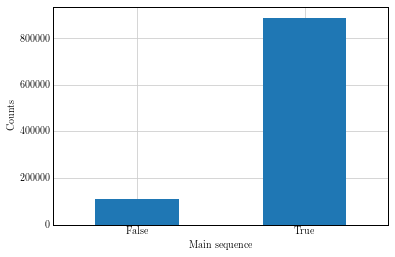

In [73]:
# aggregate the data by population
data_group = data_filt.groupby('main').count()
# bar plot the group counts, let takes x counts as the population
data_group.plot.bar(y='M_G', rot=0, legend=False)
plt.xlabel('Main sequence')
plt.ylabel('Counts')
plt.show()

In [74]:
X = data_filt[['M_G', 'br', 'logg']]
X

,M_G,br,logg
0,4.544350,0.734804,4.464
1,9.443631,1.924747,4.932
2,13.884995,3.727791,5.265
3,9.610490,1.931718,4.913
4,9.464643,2.280999,4.888
...,...,...,...
999995,4.514744,0.802306,4.422
999996,8.697364,1.922362,4.772
999997,2.615557,1.067007,3.411
999998,13.292912,0.393219,8.200


In [75]:
# transform X with minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.2073501 , 0.14309636, 0.50423455],
       [0.3383096 , 0.28111374, 0.5550488 ],
       [0.45702878, 0.49024275, 0.5912052 ],
       ...,
       [0.1557928 , 0.18162745, 0.38990226],
       [0.4412022 , 0.10347706, 0.9098805 ],
       [0.3725215 , 0.34096634, 0.5652551 ]], dtype=float32)

In [76]:
import pickle

path = join(data_dir, "scaler-main.pkl")

with open(path, 'wb') as f:
    pickle.dump(scaler, f, pickle.HIGHEST_PROTOCOL)

In [77]:
y = data_filt['main'].to_numpy()
y = y[:maks]
y

array([ True,  True,  True, ..., False, False,  True])

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [79]:
df_features = pd.DataFrame(X)
df_features.columns = ['M_G', 'br', 'logg']
df_features = vaex.from_pandas(df_features)
df_features

#,M_G,br,logg
0,0.2073501,0.14309636,0.50423455
1,0.3383096,0.28111374,0.5550488
2,0.45702878,0.49024275,0.5912052
3,0.34276977,0.2819223,0.55298585
4,0.33887124,0.32243428,0.5502714
...,...,...,...
"999,995",0.20655873,0.1509257,0.49967426
"999,996",0.31836158,0.2808372,0.5376764
"999,997",0.1557928,0.18162745,0.38990226
"999,998",0.4412022,0.10347706,0.9098805


In [80]:
df_main = pd.DataFrame(y)
df_main.columns = ['main']
df_main = vaex.from_pandas(df_main)
df_main

#,main
0,1
1,1
2,1
3,1
4,1
...,...
"999,995",1
"999,996",1
"999,997",0
"999,998",0


In [82]:
df_features.export(join(data_dir, "training-features-main.hdf5"), progress=True)
df_main.export(join(data_dir, "training-main.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 